In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [8]:
# Read the data into a pandas DataFrame
df = pd.read_csv("../api_data/monthly_api_data.csv")
df.head()


,Month,Measurement,Phase,Consumption
0,2022-09,Grid Organi lbc,PHASEA,304835.7
1,2022-09,Grid Organi lbc,PHASEB,304835.7
2,2022-09,Grid Organi lbc,PHASEC,308039.5
3,2022-09,Chargers,PHASEA,314498.6
4,2022-10,Grid Organi lbc,PHASEA,853876.7


In [9]:
# Display basic information and summary statistics.
print("DataFrame Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nFirst 5 Rows:")
df.head()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        252 non-null    object 
 1   Measurement  252 non-null    object 
 2   Phase        252 non-null    object 
 3   Consumption  252 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.0+ KB

Summary Statistics:
        Consumption
count  2.520000e+02
mean   2.596866e+06
std    2.184743e+06
min   -4.284905e+05
25%    7.008846e+05
50%    1.548080e+06
75%    4.391622e+06
max    8.785525e+06

First 5 Rows:


,Month,Measurement,Phase,Consumption
0,2022-09,Grid Organi lbc,PHASEA,304835.7
1,2022-09,Grid Organi lbc,PHASEB,304835.7
2,2022-09,Grid Organi lbc,PHASEC,308039.5
3,2022-09,Chargers,PHASEA,314498.6
4,2022-10,Grid Organi lbc,PHASEA,853876.7


In [11]:
# Convert 'Month' column to datetime format.
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print("Data after converting Month to datetime:")
df.head()

# Check for missing values
print("\nMissing values by column:")
print(df.isnull().sum())



Data after converting Month to datetime:

Missing values by column:
Month          0
Measurement    0
Phase          0
Consumption    0
dtype: int64


In [12]:
# Create a pivot table to show total consumption per Month for each Measurement.
df_pivot = df.pivot_table(index='Month', columns='Measurement', values='Consumption', aggfunc='sum')
print("Pivot Table (Monthly Consumption by Measurement):")
print(df_pivot)


Pivot Table (Monthly Consumption by Measurement):
Measurement    Chargers  Chargers achteraan  Grid Organi lbc      Solar
Month                                                                  
2022-09-01     314498.6                 NaN         917710.9        NaN
2022-10-01     978554.6                 NaN        2631330.8        NaN
2022-11-01    3264158.7                 NaN        8660603.5   180935.9
2022-12-01    4243290.7                 NaN       12706310.3   217142.2
2023-01-01    4440542.3                 NaN       12807904.1   147496.5
2023-02-01    4339339.6                 NaN       11611765.7   202586.8
2023-03-01    5258117.4                 NaN       12815889.0   346321.8
2023-04-01    4533756.0                 NaN       11020290.8   132945.6
2023-05-01    5266873.6                 NaN       11315691.5   264011.9
2023-06-01    6464697.5                 NaN       13085535.3   601159.6
2023-07-01    6021626.7                 NaN       11924531.0   677567.3
2023-08-01    

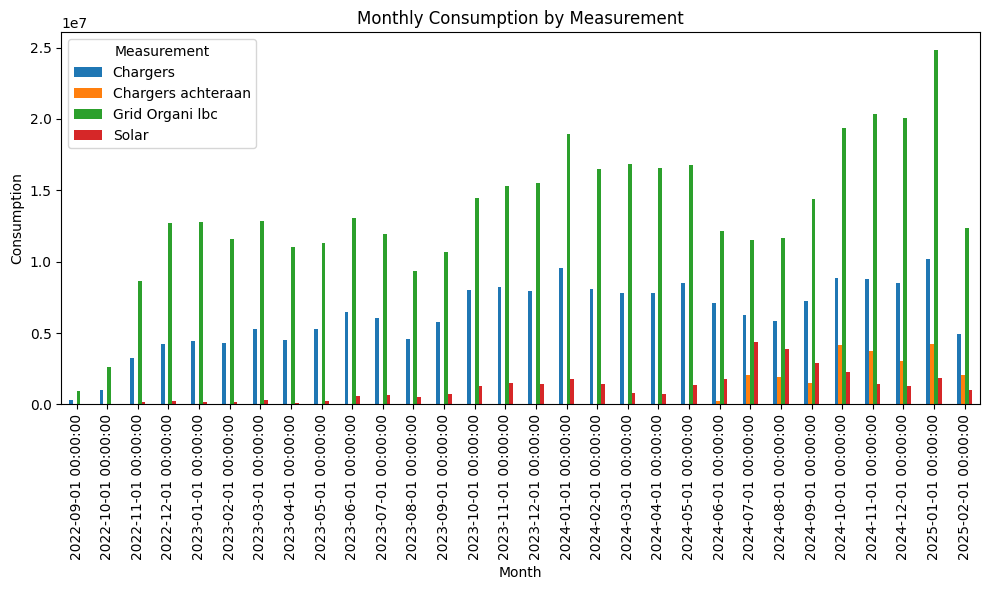

In [14]:
# Cell 6: Visualize Monthly Consumption by Measurement
df_pivot.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Consumption by Measurement')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.legend(title='Measurement')
plt.tight_layout()
plt.show()


In [15]:
# Cell 7: Aggregate Data by Month and Phase
# Create another pivot table to compare consumption by Phase.
df_phase = df.pivot_table(index='Month', columns='Phase', values='Consumption', aggfunc='sum')
print("Pivot Table (Monthly Consumption by Phase):")
print(df_phase)


Pivot Table (Monthly Consumption by Phase):
Phase           PHASEA      PHASEB      PHASEC
Month                                         
2022-09-01    619334.3    304835.7    308039.5
2022-10-01   1832431.3    853876.7    923577.4
2022-11-01   5762669.0   3122510.4   3220518.7
2022-12-01   8205114.2   4653552.2   4308076.8
2023-01-01   8273257.8   4705073.5   4417611.6
2023-02-01   7703445.5   4290593.5   4159653.1
2023-03-01   8810729.6   4794769.9   4814828.7
2023-04-01   7679723.3   4006859.3   4000409.8
2023-05-01   8290101.8   4276889.9   4279585.3
2023-06-01   9794596.2   4937285.5   5419510.7
2023-07-01   9144418.8   4629850.3   4849455.9
2023-08-01   7087463.1   3633175.6   3692337.5
2023-09-01   8399528.2   4344668.6   4433991.9
2023-10-01  11377050.9   6200178.7   6216847.3
2023-11-01  11911155.5   6757019.8   6332405.6
2023-12-01  11812235.9   6836516.0   6191167.8
2024-01-01  14085828.8   8592678.6   7603297.5
2024-02-01  12381790.2   7306639.3   6305993.4
2024-03-01  1231

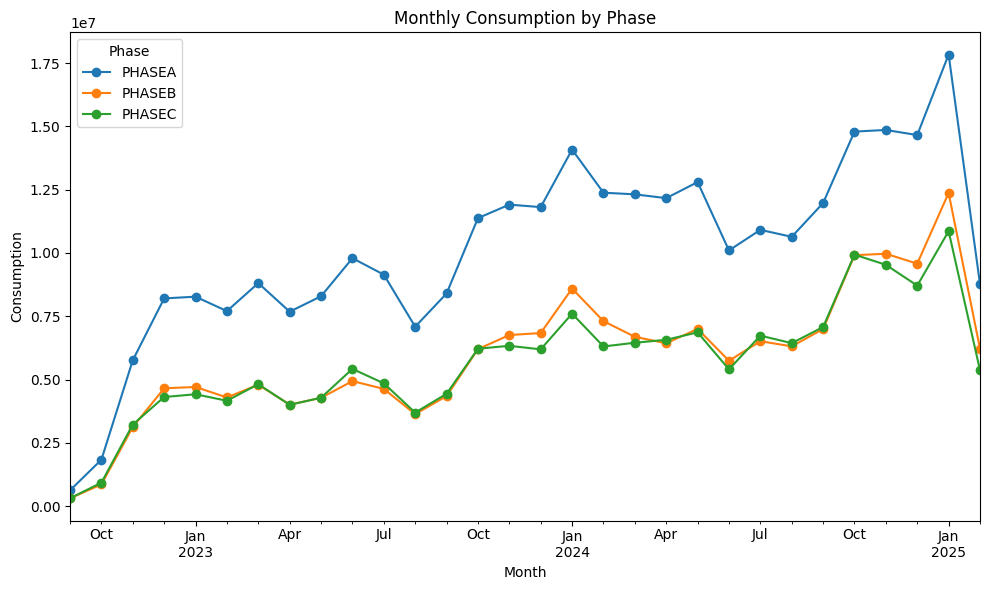

In [16]:
# Cell 8: Visualize Monthly Consumption by Phase
df_phase.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Monthly Consumption by Phase')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.legend(title='Phase')
plt.tight_layout()
plt.show()


# Cell 9: Summary and Insights

In this analysis, we have:
- Loaded the energy consumption data spanning three months.
- Converted the 'Month' column into a datetime format for proper time series analysis.
- Checked the data for missing values and verified its integrity.
- Aggregated and visualized the total consumption by both "Measurement" (e.g., Grid Organi lbc, Chargers, Solar) and by "Phase".
  
**Observations:**
- The pivot tables clearly show how consumption varies month-to-month for each category.
- The bar and line plots provide visual insight into the trends across months and among different measurements and phases.

*Further analysis could include exploring consumption trends over longer periods, identifying seasonal patterns, or applying predictive modeling techniques.*
